# Data  Preprocessing

## Library Imports

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
import numpy as np

In [8]:
import missingno as msno

## Data Imports

In [9]:
heart = pd.read_csv("data.csv")
heart_copy =heart.copy()
heart.head

<bound method NDFrame.head of      age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0     28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1     29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2     29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3     30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4     31    0   2      100  219   0       1     150     0      0.0     ?  ?   
..   ...  ...  ..      ...  ...  ..     ...     ...   ...      ...   ... ..   
289   52    1   4      160  331   0       0      94     1      2.5     ?  ?   
290   54    0   3      130  294   0       1     100     1      0.0     2  ?   
291   56    1   4      155  342   1       0     150     1      3.0     2  ?   
292   58    0   2      180  393   0       0     110     1      1.0     2  ?   
293   65    1   4      130  275   0       1     115     1      1.0     2  ?   

    thal  num        

## EDA

* Bivariate graph using seaborn

In [10]:
# heart['sex_label'] = heart['sex'].map({0: 'female', 1: 'male'}) #online code
heart_copy['sex'] = heart['sex'].map({0:'female' , 1:'male'})
heart_copy

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,male,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,male,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,male,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,female,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,female,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,male,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,female,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,male,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,female,2,180,393,0,0,110,1,1.0,2,?,7,1


In [11]:
heart.sex.value_counts(),heart["num       "].value_counts()

(sex
 1    213
 0     81
 Name: count, dtype: int64,
 num       
 0    188
 1    106
 Name: count, dtype: int64)

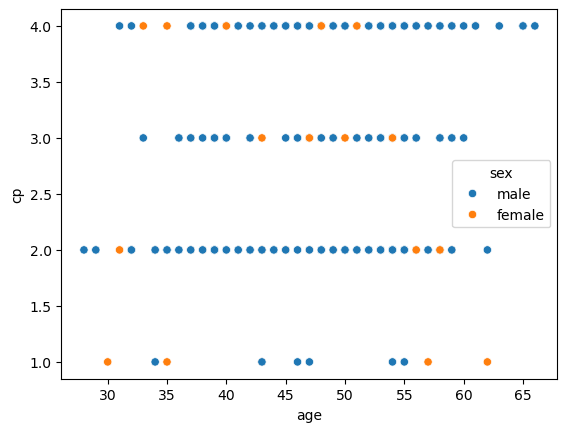

In [12]:
sns.scatterplot(x = 'age',y = 'cp',data = heart_copy,hue = 'sex')
plt.savefig("scatterplot.png")

<Axes: xlabel='age', ylabel='trestbps'>

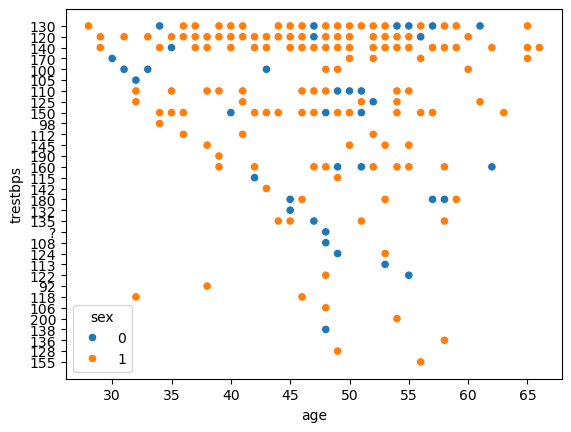

In [13]:
sns.scatterplot(x= "age",y = "trestbps",data = heart,hue = "sex" )

In [14]:
heart.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [15]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [16]:
heart.isnull().sum()#Check total null values in each column

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

* Categorical plot are uses catogrical data

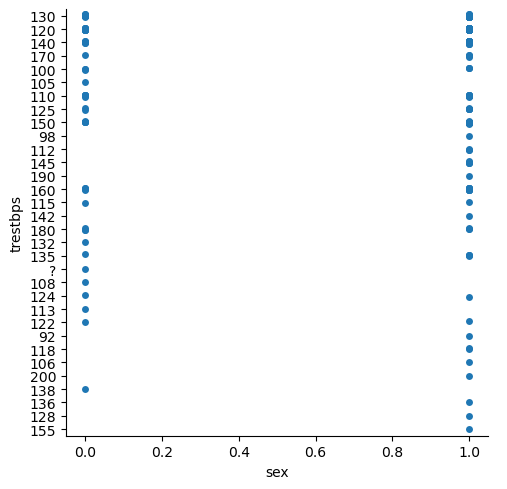

In [17]:
sns.catplot(x= "sex",y = "trestbps",data = heart)

In [18]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [19]:
heart_copy.drop_duplicates().shape

(293, 14)

In [20]:
heart.describe(),heart_copy.describe()

(              age         sex          cp     oldpeak  num       
 count  294.000000  294.000000  294.000000  294.000000  294.000000
 mean    47.826531    0.724490    2.982993    0.586054    0.360544
 std      7.811812    0.447533    0.965117    0.908648    0.480977
 min     28.000000    0.000000    1.000000    0.000000    0.000000
 25%     42.000000    0.000000    2.000000    0.000000    0.000000
 50%     49.000000    1.000000    3.000000    0.000000    0.000000
 75%     54.000000    1.000000    4.000000    1.000000    1.000000
 max     66.000000    1.000000    4.000000    5.000000    1.000000,
               age          cp     oldpeak  num       
 count  294.000000  294.000000  294.000000  294.000000
 mean    47.826531    2.982993    0.586054    0.360544
 std      7.811812    0.965117    0.908648    0.480977
 min     28.000000    1.000000    0.000000    0.000000
 25%     42.000000    2.000000    0.000000    0.000000
 50%     49.000000    3.000000    0.000000    0.000000
 75%     54

## Handling Missing Values

In [21]:
for val,col in heart.items():
    sumofnan = 0
    sumofq = 0
    if val == val:
        for c in col:
            if c == None:
                sumofnan += 1
            elif c == "?":
                sumofq += 1
        print(f"The {val} has none: {sumofnan} and ?: {sumofq}",'\n')
                

The age has none: 0 and ?: 0 

The sex has none: 0 and ?: 0 

The cp has none: 0 and ?: 0 

The trestbps has none: 0 and ?: 1 

The chol has none: 0 and ?: 23 

The fbs has none: 0 and ?: 8 

The restecg has none: 0 and ?: 1 

The thalach has none: 0 and ?: 1 

The exang has none: 0 and ?: 1 

The oldpeak has none: 0 and ?: 0 

The slope has none: 0 and ?: 190 

The ca has none: 0 and ?: 291 

The thal has none: 0 and ?: 266 

The num        has none: 0 and ?: 0 



* To change value one by one by replace method

In [22]:
heart.trestbps.replace('?',heart.cp.mean(),inplace = True)
heart.slope.replace('?',heart.cp.mean(),inplace = True)

C:\Users\bavit\AppData\Local\Temp\ipykernel_10164\725616963.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart.trestbps.replace('?',heart.cp.mean(),inplace = True)
C:\Users\bavit\AppData\Local\Temp\ipykernel_10164\725616963.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


* To change value totally by replace method

In [23]:
heart.replace('?',heart.cp.mean(),inplace = True)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,2.982993,2.982993,2.982993,0
1,29,1,2,120,243,0,0,160,0,0.0,2.982993,2.982993,2.982993,0
2,29,1,2,140,2.982993,0,0,170,0,0.0,2.982993,2.982993,2.982993,0
3,30,0,1,170,237,0,1,170,0,0.0,2.982993,2.982993,6,0
4,31,0,2,100,219,0,1,150,0,0.0,2.982993,2.982993,2.982993,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,2.982993,2.982993,2.982993,1
290,54,0,3,130,294,0,1,100,1,0.0,2,2.982993,2.982993,1
291,56,1,4,155,342,1,0,150,1,3.0,2,2.982993,2.982993,1
292,58,0,2,180,393,0,0,110,1,1.0,2,2.982993,7,1


In [24]:
heart.isnull().sum() # isnull can be replaced by isna because both means the same

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

<Axes: >

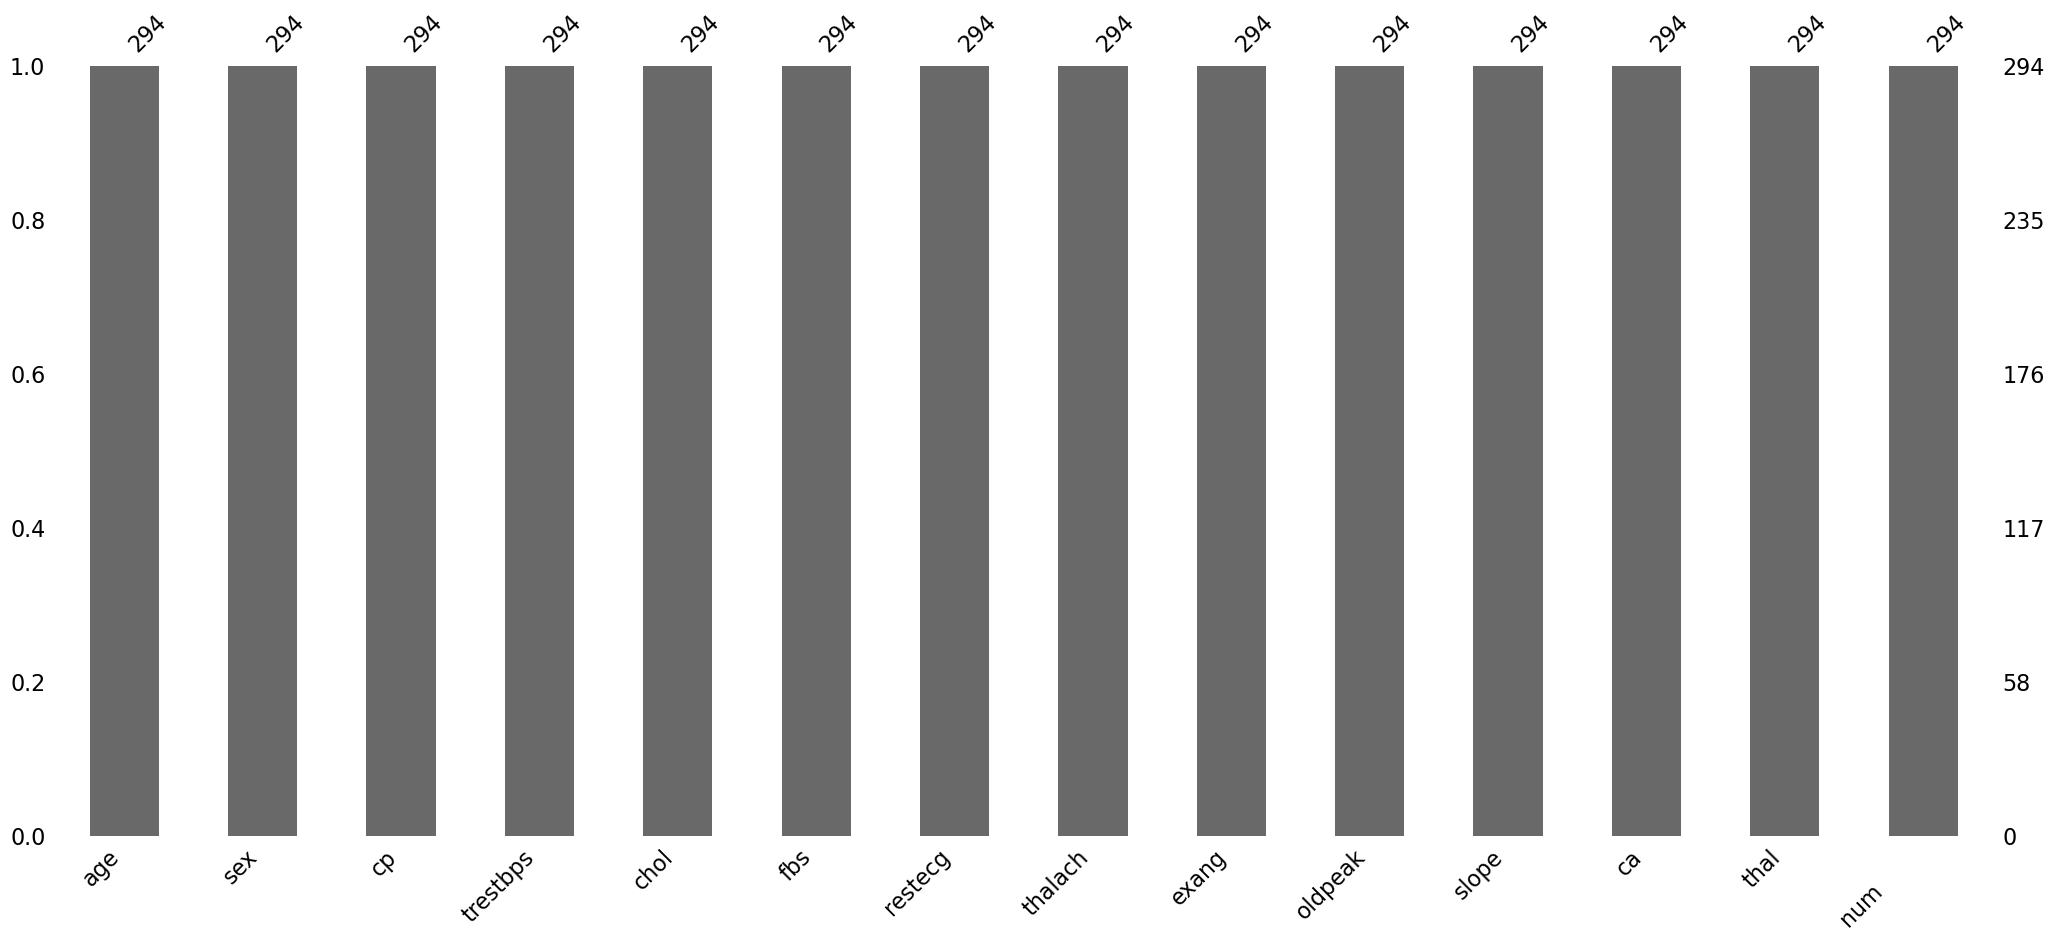

In [25]:
msno.bar(heart)#relate this graph with above data

In [26]:
heart.shape[0],heart.shape[1]

(294, 14)

In [27]:
sum(heart.isna().sum())

0

In [28]:
missing_data = (heart.isna().sum()/heart.shape[0])*100 #Shows how much missing values in each columns
missing_data = pd.DataFrame(missing_data)

In [29]:
string_columns = heart.select_dtypes(include='object').columns
string_columns

Index(['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca',
       'thal'],
      dtype='object')

## Feature Engineering

In [30]:
for i,j in heart.items():
    if i == i:
        i = []
        for k in j:
            if  isinstance(k,str):
                i.append(k)
        print(len(i))
                

0
0
0
293
271
286
293
293
293
0
104
3
28
0


In [31]:
for i in heart.columns:
    heart[i] = heart[i].astype(int)

In [32]:
string_columns = heart.select_dtypes(include='object').columns
len(string_columns)

0

## Handling outliers

<Axes: >

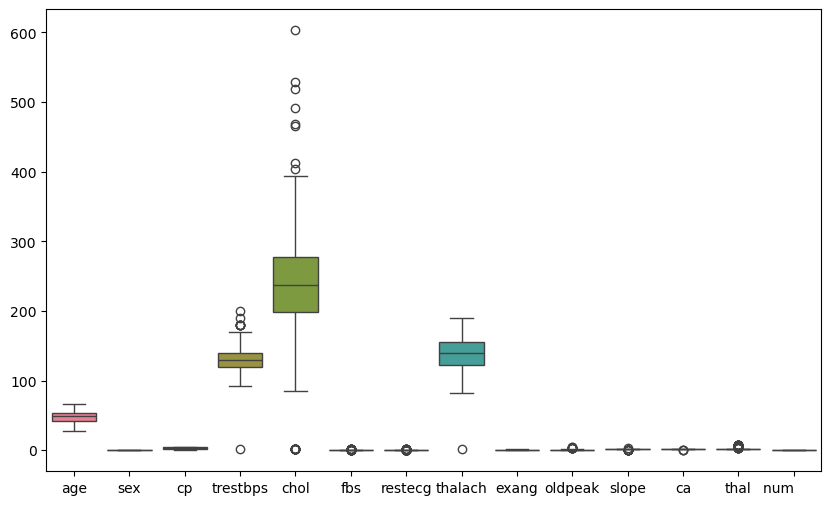

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(heart)

In [34]:
q1 = heart.oldpeak.quantile(0.25)
q1

0.0

In [35]:
q3 = heart.oldpeak.quantile(0.75)
q3

1.0

In [36]:
interquartile_range = q3 - q1
interquartile_range

1.0

In [37]:
lower_bd = q1 - (1.5*interquartile_range)
lower_bd

-1.5

In [38]:
upper_bd = q3 + (1.5*interquartile_range)
upper_bd

2.5

In [39]:
outlier = []
for i in heart.oldpeak:
    if i< lower_bd or i>upper_bd:
        outlier.append(i)
outlier = set(outlier)
outlier = list(outlier)
outlier

[3, 4, 5]

In [40]:
outlier_rpl = heart.oldpeak.mean()
outlier_rpl

0.5476190476190477

In [41]:
heart.oldpeak.replace([3.0,4.0,5.0],outlier_rpl,inplace=True)   

C:\Users\bavit\AppData\Local\Temp\ipykernel_10164\1762941586.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart.oldpeak.replace([3.0,4.0,5.0],outlier_rpl,inplace=True)


In [42]:
heart.rename(columns = {'num       ' : 'target'},inplace = True)
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [43]:
heart['target'] = heart["target"].astype(str)
heart.select_dtypes(include = 'object').columns

Index(['target'], dtype='object')

In [44]:
X = heart.drop("target",axis = 1)
y = heart.target
X,y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
 0     28    1   2       130   132    0        2      185      0  0.000000   
 1     29    1   2       120   243    0        0      160      0  0.000000   
 2     29    1   2       140     2    0        0      170      0  0.000000   
 3     30    0   1       170   237    0        1      170      0  0.000000   
 4     31    0   2       100   219    0        1      150      0  0.000000   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...       ...   
 289   52    1   4       160   331    0        0       94      1  2.000000   
 290   54    0   3       130   294    0        1      100      1  0.000000   
 291   56    1   4       155   342    1        0      150      1  0.547619   
 292   58    0   2       180   393    0        0      110      1  1.000000   
 293   65    1   4       130   275    0        1      115      1  1.000000   
 
      slope  ca  thal  
 0        2   2     2  
 1        2   

## Data Visualization

<Axes: >

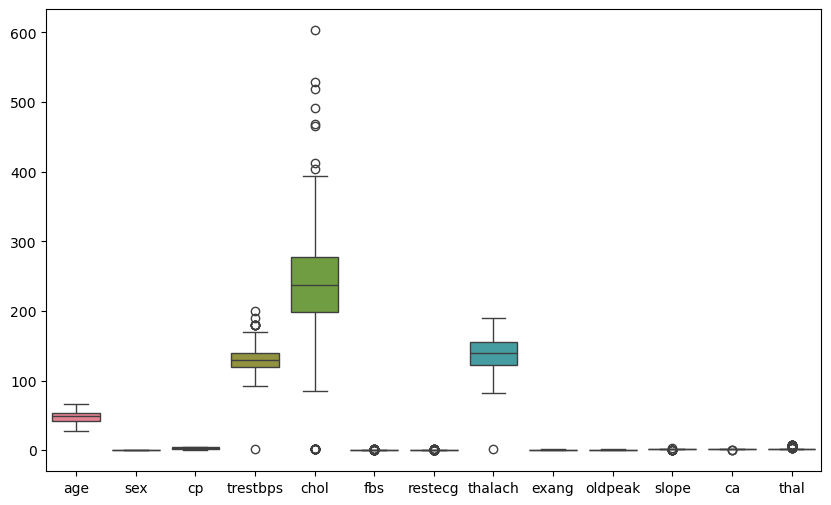

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(heart)

2

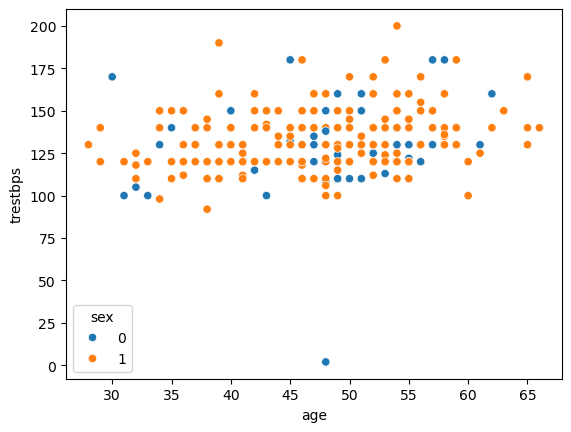

In [46]:
sns.scatterplot(x= "age",y = "trestbps",data = heart,hue = "sex" )
heart.trestbps.min()

In [47]:
w11 = heart.oldpeak.quantile(1.0)
w11,heart.oldpeak.describe()

(2.0,
 count    294.000000
 mean       0.445659
 std        0.686055
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        1.000000
 max        2.000000
 Name: oldpeak, dtype: float64)

131.02380952380952

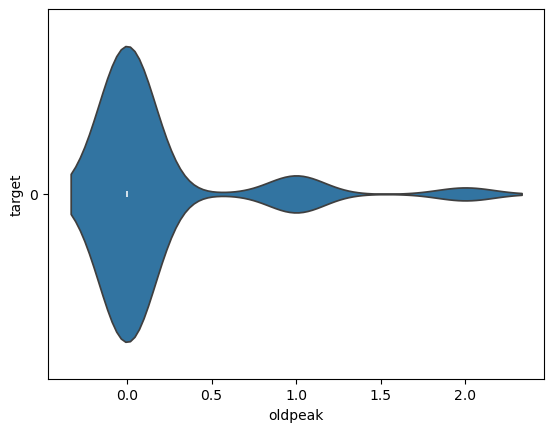

In [48]:
target_0 = heart[heart["target"] == "0"]
sns.violinplot(x = 'oldpeak',y = "target",data = target_0)
sum(heart.oldpeak)

# Model Building

## Train Test Split

In [49]:
heart.shape

(294, 14)

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [51]:
knn_model = KNeighborsClassifier(n_neighbors=7)

In [52]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [53]:
y_pred = knn_model.predict(X_test)
y_pred

array(['1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0',
       '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1',
       '0', '0', '0', '1', '0', '0', '0'], dtype=object)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6101694915254238